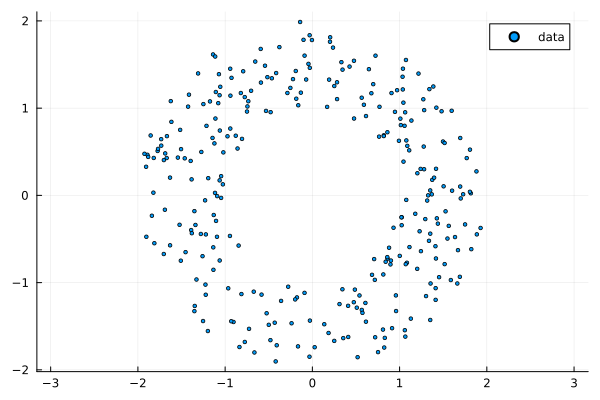

In [4]:
using LinearAlgebra
using Plots
using Ripserer

function annulus(n, r1=1, r2=2, offset=(0, 0))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

data = annulus(300)

scatter(data; label="data", markersize=2, aspect_ratio=1)

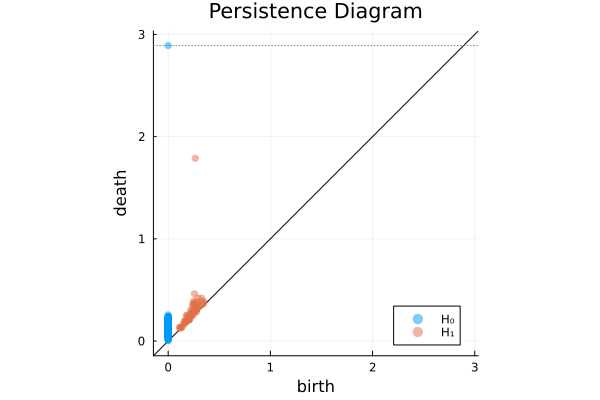

In [5]:
diagram = ripserer(data)
plot(diagram)

In [6]:
most_persistent = diagram[2][end]

[0.265, 1.79) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}

In [9]:
death_sx = death_simplex(most_persistent)

2-dimensional Simplex(index=1346629, birth=1.7877004546288675):
  +(202, 164, 126)

In [10]:
data[death_sx]

3-element StaticArraysCore.SizedVector{3, Tuple{Float64, Float64}, Vector{Tuple{Float64, Float64}}} with indices SOneTo(3):
 (-0.16155403275565083, 1.0328906642012328)
 (-0.8455940203131478, -0.5755413953179542)
 (0.9303678410449492, -0.37101173369954)

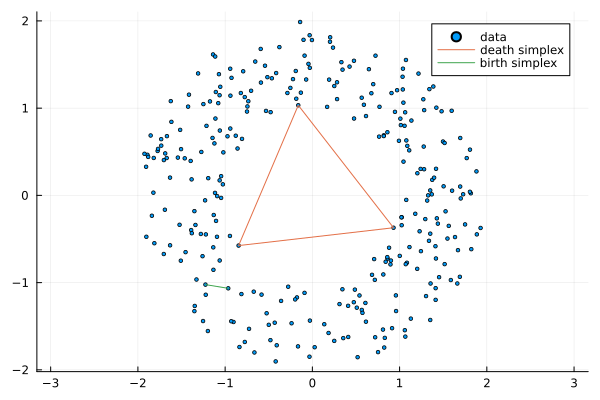

In [11]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(death_sx, data; label="death simplex")
plot!(birth_simplex(diagram[2][end]), data; label="birth simplex")

In [12]:
diagram_cocycles = ripserer(data; reps=true)
most_persistent_co = diagram_cocycles[2][end]

[0.265, 1.79) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 1091-element Chain{Mod{2},Simplex{1, Float64, Int64}}

In [13]:
cocycle = representative(most_persistent_co)

1091-element Chain{Mod{2},Simplex{1, Float64, Int64}}:
 +Simplex{1}((103, 99), 0.2647540002966775) => 1 mod 2
 +Simplex{1}((103, 87), 0.2685153126798605) => 1 mod 2
 +Simplex{1}((161, 103), 0.271998831529487) => 1 mod 2
 +Simplex{1}((268, 154), 0.2904514985106127) => 1 mod 2
 +Simplex{1}((154, 119), 0.31192754880445295) => 1 mod 2
 +Simplex{1}((268, 114), 0.3231537842583508) => 1 mod 2
 +Simplex{1}((129, 103), 0.33390156640500873) => 1 mod 2
 +Simplex{1}((119, 114), 0.3496067395061791) => 1 mod 2
 +Simplex{1}((285, 103), 0.37806295390886785) => 1 mod 2
 +Simplex{1}((154, 149), 0.40586100025043026) => 1 mod 2
 ⋮
 +Simplex{1}((156, 154), 1.781119443310352) => 1 mod 2
 +Simplex{1}((259, 53), 1.7811709794940096) => 1 mod 2
 +Simplex{1}((51, 46), 1.7816223925916832) => 1 mod 2
 +Simplex{1}((233, 161), 1.783173729817006) => 1 mod 2
 +Simplex{1}((167, 89), 1.78345529888531) => 1 mod 2
 +Simplex{1}((42, 37), 1.7843326528502337) => 1 mod 2
 +Simplex{1}((174, 154), 1.7844149141418204) => 1 mod 2

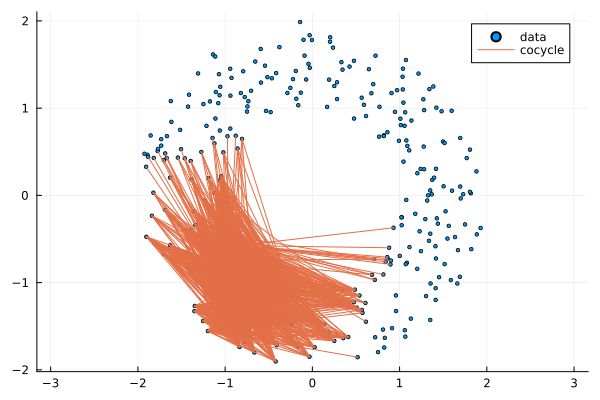

In [14]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(cocycle, data; label="cocycle")

In [15]:
diagram_cycles = ripserer(data; alg=:involuted)
most_persistent_ho = diagram_cycles[2][end]

[0.265, 1.79) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 86-element Chain{Mod{2},Simplex{1, Float64, Int64}}

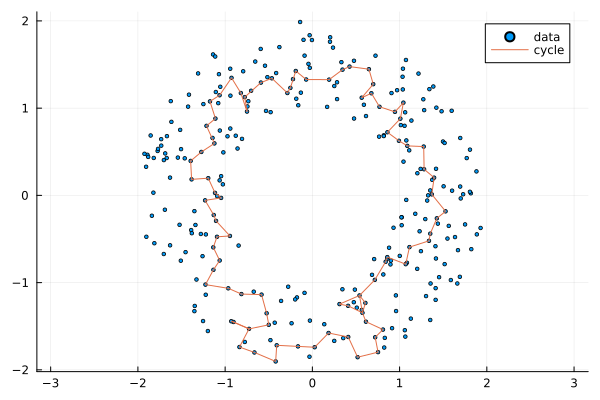

In [16]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho, data; label="cycle")

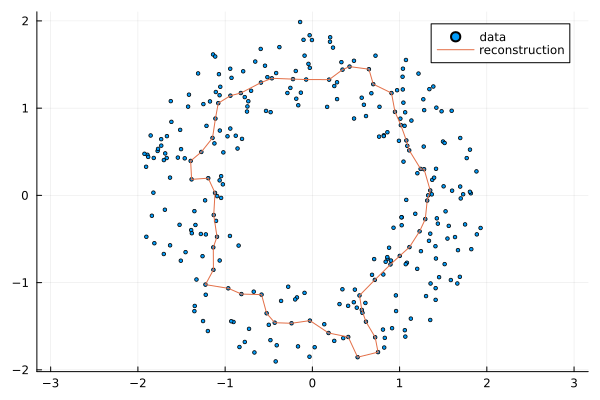

In [17]:
filtration = diagram_cocycles[2].filtration
reconstructed_at_birth = reconstruct_cycle(filtration, most_persistent_co)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(reconstructed_at_birth, data; label="reconstruction")

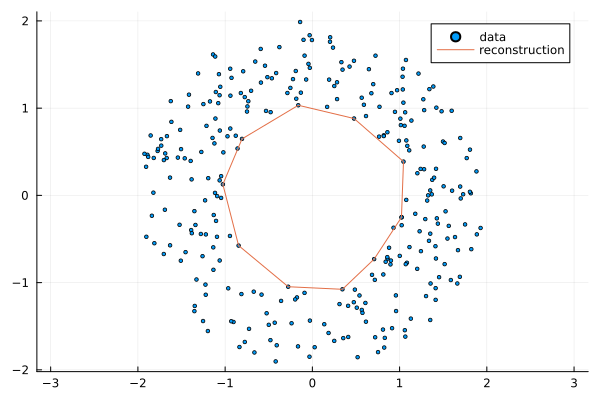

In [18]:
midpoint = (death(most_persistent_co) - birth(most_persistent_co)) / 2
reconstructed_at_midpoint = reconstruct_cycle(filtration, most_persistent_co, midpoint)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(reconstructed_at_midpoint, data; label="reconstruction")

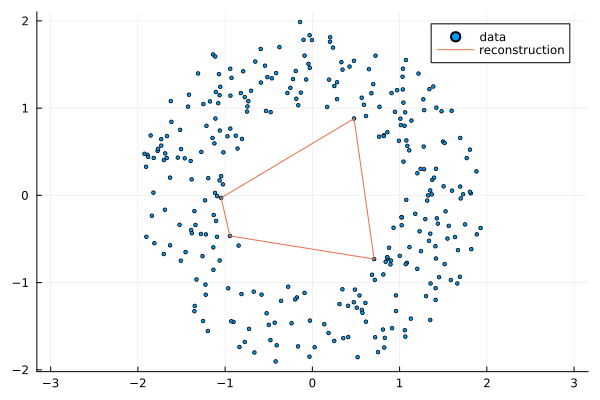

In [19]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(
    reconstruct_cycle(filtration, most_persistent_co, death(most_persistent_co) - 0.01),
    data;
    label="reconstruction",
)